In [60]:
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings(action='ignore')
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [61]:
def seed_everything(seed):
    random.seed(seed) #파이썬 자체 모듈 random 모듈의 시드 고정
    os.environ['PYTHONHASHSEED'] = str(seed) 
    np.random.seed(seed) #넘파이를 사용할 경우
#     torch.manual_seed(seed)
#     torch.cuda.manual_seed(seed)
#     torch.backends.cudnn.deterministic = True
    
seed_everything(37) # Seed 고정

# Data Load

In [62]:
#데이터프레임 불러오기
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
submission = pd.read_csv('./sample_submission.csv')
submission2 = pd.read_csv('./sample_submission.csv')
submission3 = pd.read_csv('./sample_submission.csv')

In [102]:
submission5 = pd.read_csv('./sample_submission.csv')

In [11]:
train_df.head()

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
2,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN
3,TRAIN_003,2,0.537325,2022-06-13 5:39,T050307,A_31,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN
4,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN


In [127]:
test_df.head(10)

,PRODUCT_ID,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TEST_000,2022-09-09 2:01,T100306,T_31,2.000000,94.000000,0.0,45.0,10.00000,0.0,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
1,TEST_001,2022-09-09 2:09,T100304,T_31,2.000000,93.000000,0.0,45.0,11.00000,0.0,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
2,TEST_002,2022-09-09 8:42,T100304,T_31,2.000000,95.000000,0.0,45.0,11.00000,0.0,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
3,TEST_003,2022-09-09 10:56,T010305,A_31,2.409742,95.123209,0.0,45.0,10.39255,0.0,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
4,TEST_004,2022-09-09 11:04,T010306,A_31,2.409742,95.123209,0.0,45.0,10.39255,0.0,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
5,TEST_005,2022-09-09 19:35,T010306,A_31,2.409742,95.123209,0.0,45.0,10.39255,0.0,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
6,TEST_006,2022-09-09 19:43,T010305,A_31,2.409742,95.123209,0.0,45.0,10.39255,0.0,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
7,TEST_007,2022-09-10 12:27,T050304,A_31,2.409742,95.123209,0.0,45.0,10.39255,0.0,...,57.7400,52.5100,54.4500,57.9900,63.1600,1.0,0.0,0.0,0.0,0.0
8,TEST_008,2022-09-10 12:35,T050304,A_31,2.409742,95.123209,0.0,45.0,10.39255,0.0,...,53.1800,56.0200,41.7900,47.9400,60.7200,1.0,0.0,0.0,0.0,0.0
9,TEST_009,2022-09-10 14:13,T010306,A_31,2.409742,95.123209,0.0,45.0,10.39255,0.0,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0


In [13]:
submission.head()

,PRODUCT_ID,Y_Class
0,TEST_000,0
1,TEST_001,0
2,TEST_002,0
3,TEST_003,0
4,TEST_004,0


위 세 가지 데이터 프레임을 보고 우리가 무엇을 예측해야하는지 알 수 있다.

# Data Preprocessing

데이터 전처리(Data preprocessing)의 목적은 

주어진원본 데이터를 신경망에 적용하기 쉽도록 만드는 것이다.

벡터화(vectorization), 정규화(normalization), 

특성 추출(Feature Engineering)등이 포함된다.

### Feature Engineering

**train data 필요없는 column 삭제** (점수가 더 낮아진다. 이제 사용 x)

In [4]:
# del_allnull = []
# for i in train_df.columns:
#     if train_df[i].isnull().sum() == 598:
# #         print(i)
#         del_allnull.append(i)
#         del train_df[i]
        
# train_df.head()

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2862,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,...,189.0,383.0,368.296296,353.0,39.34,40.89,32.56,34.09,77.77,NaN
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,NaN,NaN,...,185.6,383.0,367.735849,353.0,38.89,42.82,43.92,35.34,72.55,NaN
2,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,NaN,NaN,NaN,NaN,...,165.5,383.0,367.320755,353.0,39.19,36.65,42.47,36.53,78.35,NaN
3,TRAIN_003,2,0.537325,2022-06-13 5:39,T050307,A_31,NaN,NaN,NaN,NaN,...,165.8,384.0,369.188679,353.0,37.74,39.17,52.17,30.58,71.78,NaN
4,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,NaN,NaN,NaN,NaN,...,182.6,383.0,367.351852,352.0,38.70,41.89,46.93,33.09,76.97,NaN


In [5]:
# del_allzero = []
# for i in train_df.columns:
#     if train_df[i].sum() == 0.0:
# #         print(i)
#         del_allzero.append(i)
#         del train_df[i]
        
# train_df.describe()

,Y_Class,Y_Quality,X_1,X_2,X_4,X_5,X_7,X_8,X_9,X_10,...,X_2862,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871
count,598.000000,598.000000,349.000000,349.000000,349.0,349.000000,349.000000,349.000000,349.000000,349.0,...,249.000000,249.000000,249.000000,249.000000,100.000000,100.00000,100.000000,100.000000,100.00000,99.0
mean,1.025084,0.530896,2.409742,95.123209,45.0,10.392550,48.802292,10.048711,41.469914,2.0,...,163.290763,423.558233,406.088187,388.064257,50.807300,53.60770,49.606200,51.659800,66.64970,1.0
std,0.565069,0.007401,5.895256,4.107640,0.0,0.489019,4.373824,0.215571,10.515032,0.0,...,11.514477,38.335184,37.299901,36.054561,7.011828,8.13899,7.158917,8.913065,4.52781,0.0
min,0.000000,0.500856,1.000000,87.000000,45.0,10.000000,45.000000,10.000000,31.000000,2.0,...,125.700000,373.000000,357.698113,342.000000,32.120000,31.70000,32.560000,30.490000,61.67000,1.0
25%,1.000000,0.527535,2.000000,93.000000,45.0,10.000000,45.000000,10.000000,31.000000,2.0,...,157.200000,384.000000,368.296296,352.000000,49.485000,52.20000,42.160000,49.915000,63.64500,1.0
50%,1.000000,0.530436,2.000000,95.000000,45.0,10.000000,45.000000,10.000000,31.000000,2.0,...,163.300000,446.000000,427.867925,406.000000,53.425000,55.92500,51.460000,56.175000,65.14000,1.0
75%,1.000000,0.533433,2.000000,98.000000,45.0,11.000000,51.000000,10.000000,52.000000,2.0,...,169.100000,465.000000,443.807692,423.000000,55.287500,58.97500,55.030000,57.175000,67.11500,1.0
max,2.000000,0.578841,103.000000,102.000000,45.0,11.000000,62.000000,11.000000,52.000000,2.0,...,194.600000,473.000000,450.692308,434.000000,60.240000,68.66000,60.410000,59.930000,79.75000,1.0


**train data에서 제거한 column들, test data에서도 삭제**

In [6]:
# test_df.drop(del_allnull, axis = 1, inplace = True)

In [7]:
# test_df.drop(del_allzero, axis = 1, inplace = True)

### Feature Selection

데이터 전처리. 결측값을 각 column의 평균값으로 채운다.

In [63]:
train_df = train_df.fillna(train_df.mean()) #결측치를 평균값으로 채운다.
test_df = test_df.fillna(train_df.mean())

train_df = train_df.fillna(0.0) #한 행의 모든 value값이 전부 NaN인 경우, 채워지지 않으므로 0.0을 넣어준다.
test_df = test_df.fillna(0.0)

In [64]:
train_y = train_df['Y_Class']

학습에 쓰이지 않을 column들을 제거한다.

In [65]:
train_x = train_df.drop(columns = ['PRODUCT_ID', 'TIMESTAMP', 'Y_Class', 'Y_Quality'])
#모델 학습이 끝나고 예측에 쓰일 test데이터
test_x = test_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])

범주형 데이터를 수치 데이터로 전환하기 위해 LabelEncoder 활용

In [66]:
# qualitative to quantitative
qual_col = ['LINE', 'PRODUCT_CODE']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i]) #원래 column 값을 기준으로 fit.
    train_x[i] = le.transform(train_x[i]) #수치화, 수치로 변형
    
    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i]) 
print('Done.')

Done.


In [19]:
train_x

,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,2,0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,39.3400,40.8900,32.5600,34.0900,77.7700,1.0,0.0,0.0,0.0,0.0
1,3,0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,38.8900,42.8200,43.9200,35.3400,72.5500,1.0,0.0,0.0,0.0,0.0
2,2,0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,39.1900,36.6500,42.4700,36.5300,78.3500,1.0,0.0,0.0,0.0,0.0
3,3,0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,37.7400,39.1700,52.1700,30.5800,71.7800,1.0,0.0,0.0,0.0,0.0
4,2,0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,38.7000,41.8900,46.9300,33.0900,76.9700,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,5,2,2.000000,95.000000,0.0,45.0,10.00000,0.0,50.000000,10.000000,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
594,2,0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,49.4700,53.0700,50.8900,55.1000,66.4900,1.0,0.0,0.0,0.0,0.0
595,2,0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
596,4,1,40.000000,94.000000,0.0,45.0,11.00000,0.0,45.000000,10.000000,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0


In [20]:
test_x

,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,5,2,2.000000,94.000000,0.0,45.0,10.00000,0.0,51.000000,10.000000,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
1,4,2,2.000000,93.000000,0.0,45.0,11.00000,0.0,45.000000,10.000000,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
2,4,2,2.000000,95.000000,0.0,45.0,11.00000,0.0,45.000000,10.000000,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
3,0,0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
4,1,0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,5,2,2.000000,91.000000,0.0,45.0,10.00000,0.0,51.000000,10.000000,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
306,4,2,2.000000,96.000000,0.0,45.0,11.00000,0.0,45.000000,10.000000,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
307,5,2,2.000000,91.000000,0.0,45.0,10.00000,0.0,50.000000,10.000000,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
308,5,2,2.000000,95.000000,0.0,45.0,10.00000,0.0,51.000000,10.000000,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0


### Modeling

1.모델 선택 - sklearn라이브러리 활용 - RandomForest 

2.모델 학습 - train_df를 활용하여 1번에서 정의한 모델로 학습

3.예측 - 학습된 모델을 바탕으로 test 데이터를 예측

4.정답 파일 생성 - 정답 파일 생성 및 제출 필요(경진대회를 위해 필요한 과정.)

# Adaboost

In [51]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier

Adab_clf = AdaBoostClassifier(n_estimators=1, 
                        random_state=37, 
                        learning_rate=0.005)
Adab_clf.fit(train_x, train_y)


### GridSearchCV 파라미터 최적화

In [56]:
#Adaboost 파라미터 최적화를 위한 GridSearchCV
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators' : [1,2,3,4,5,10,20],
    'learning_rate' : [0.005, 0.01,0.015, 0.02,0.03]
}

grid_cv = GridSearchCV(Adab_clf, param_grid=param, cv=2, verbose=1, n_jobs=-1)
grid_cv.fit(train_x, train_y.values)
preds = grid_cv.predict(test_x)
submission['Y_Class'] = preds
submission.to_csv('./t11_adaboost.csv', index=False)
print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 35 candidates, totalling 70 fits
최적 하이퍼 파라미터: 
 {'learning_rate': 0.005, 'n_estimators': 1}
최고 예측 정확도: 0.6438


# GBM gradient boosting machine

### default 파라미터 값으로 모델 학습 및 예측

In [73]:
#GBM Gradient Boosting Machine
from sklearn.ensemble import GradientBoostingClassifier 

# 예시 데이터셋 불러오기
GBM_clf = GradientBoostingClassifier(random_state=37)
GBM_clf.fit(train_x, train_y.values)
preds = GBM_clf.predict(test_x)
submission['Y_Class'] == preds
submission.to_csv('./t11_GBM_defualt.csv', index = False)

### RamdomSearchCV 파라미터 최적화

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators' : randint(low=1, high=200),
    #'learning_rate' : randint(low=0.01, high=0.1),
    'min_samples_split': randint(low = 1, high = 10),
    'min_samples_leaf': randint(low = 1, high = 17)
}

GBM_clf2 = GradientBoostingClassifier(random_state=37)
rand_cv = RandomizedSearchCV(GBM_clf2, 
                            param_distributions=param_distribs,
                            cv = 5, 
                            n_jobs = -1,
                            verbose=3)
rand_cv.fit(train_x, train_y)
preds = rand_cv.predict(test_x)
submission2['Y_Class'] = preds
submission2.to_csv('./t11_GBM_RandomSearchCV.csv', index=False)

print(f'최적 하이퍼 파라미터: {rand_cv.best_params_}')
print(f'최고 예측 정확도: {(rand_cv.best_score_)*100:.4f}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
최적 하이퍼 파라미터: {'min_samples_leaf': 16, 'min_samples_split': 2, 'n_estimators': 88}
최고 예측 정확도: 62.2157


In [116]:
#GBM Gradient Boosting Machine
from sklearn.ensemble import GradientBoostingClassifier 

# 예시 데이터셋 불러오기
GBM_clf4 = GradientBoostingClassifier(random_state=37, 
                                      min_samples_leaf = 16, 
                                      min_samples_split = 2, 
                                      n_estimators = 88)
GBM_clf4.fit(train_x, train_y.values)
preds = GBM_clf4.predict(test_x)
submission6 = pd.read_csv('./sample_submission.csv')
submission6['Y_Class'] == preds
submission6.to_csv('./t11_GBM_grid_refit.csv', index = False)

### GridSearchCV 파라미터 최적화

In [74]:
#GBM 파라미터 최적화를 위한 GridSearchCV
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators' : [10,20,30,50],
    'learning_rate' : [0.01, 0.02, 0.05],
    'min_samples_split':[1,2,3,4,8],
    'min_samples_leaf':[1,8,16,17]
    
}
GBM_clf3 = GradientBoostingClassifier(random_state=37)

grid_cv = GridSearchCV(GBM_clf3, param_grid=param, cv=2, verbose=1, n_jobs=-1)
grid_cv.fit(train_x, train_y.values)
preds = grid_cv.predict(test_x)
submission3['Y_Class'] = preds
submission3.to_csv('./t11_GBM_GridSearchCV.csv', index=False)
print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 240 candidates, totalling 480 fits
최적 하이퍼 파라미터: 
 {'learning_rate': 0.05, 'min_samples_leaf': 17, 'min_samples_split': 2, 'n_estimators': 10}
최고 예측 정확도: 0.6906


### Bayesian Optimization

In [90]:
import sys   
!{sys.executable} -m pip install bayesian-optimization

In [100]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

gbm_parameter_bounds = {
                      'n_estimators' : (30,100),
                      'max_depth' : (1,3), # 나무의 깊이
                      'subsample' : (0.5,1)
                      }
 
 
def gbm_bo(n_estimators, max_depth, subsample):

    gbm_params = {
              'n_estimators' : int(round(n_estimators)),
              'max_depth' : int(round(max_depth)),
               'subsample' : int(round(subsample)),      
              }

    gbm = GradientBoostingClassifier(**gbm_params)
    train_xx, valid_x, train_yy, valid_y = train_test_split(train_x, train_y, test_size = 0.2)
    gbm.fit(train_x,train_y)

    score = accuracy_score(valid_y, gbm.predict(valid_x))

    return score
 
BO_gbm = BayesianOptimization(f = gbm_bo, pbounds = gbm_parameter_bounds, random_state = 37)
 
BO_gbm.maximize(init_points = 5, n_iter = 5)

|   iter    |  target   | max_depth | n_esti... | subsample |
-------------------------------------------------------------
| 1         | 0.975     | 2.889     | 62.49     | 0.5964    |
| 2         | 0.9417    | 2.164     | 73.41     | 0.8421    |
| 3         | 0.8917    | 1.207     | 82.18     | 0.641     |
| 4         | 0.9917    | 2.507     | 85.49     | 0.8137    |
| 5         | 0.9417    | 1.887     | 97.44     | 0.9485    |
| 6         | 0.9417    | 2.972     | 33.21     | 0.8043    |
| 7         | 0.9333    | 2.837     | 59.74     | 0.6364    |
| 8         | 0.9       | 1.779     | 73.77     | 0.9963    |
| 9         | 0.9417    | 2.778     | 38.93     | 0.7149    |
| 10        | 0.9333    | 2.948     | 62.54     | 0.6005    |


In [122]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

gbm_parameter_bounds = {
                      'n_estimators' : (30,100),
                      'max_depth' : (1,3), # 나무의 깊이
                      'subsample' : (0.5,1)
                      }
 
 
def gbm_bo(n_estimators, max_depth, subsample):

    gbm_params = {
              'n_estimators' : int(round(n_estimators)),
              'max_depth' : int(round(max_depth)),
               'subsample' : int(round(subsample)),      
              }

    gbm = GradientBoostingClassifier(**gbm_params)
    train_xx, valid_x, train_yy, valid_y = train_test_split(train_x, train_y, test_size = 0.2)
    gbm.fit(train_x,train_y)

    score = f1_score(valid_y, gbm.predict(valid_x), average = 'macro')

    return score
 
BO_gbm = BayesianOptimization(f = gbm_bo, pbounds = gbm_parameter_bounds, random_state = 37)
 
BO_gbm.maximize(init_points = 5, n_iter = 5)

|   iter    |  target   | max_depth | n_esti... | subsample |
-------------------------------------------------------------
| 1         | 0.9524    | 2.889     | 62.49     | 0.5964    |
| 2         | 0.9256    | 2.164     | 73.41     | 0.8421    |
| 3         | 0.8747    | 1.207     | 82.18     | 0.641     |
| 4         | 0.9552    | 2.507     | 85.49     | 0.8137    |
| 5         | 0.9466    | 1.887     | 97.44     | 0.9485    |
| 6         | 0.8841    | 2.972     | 33.21     | 0.8043    |
| 7         | 0.9662    | 2.837     | 59.74     | 0.6364    |
| 8         | 0.8973    | 1.605     | 60.82     | 0.535     |
| 9         | 0.8932    | 2.778     | 38.93     | 0.7149    |
| 10        | 0.9628    | 2.828     | 59.79     | 0.6291    |


### Bayesian Optimization으로 최적화한 파라미터로 학습 및 예측

In [104]:
#accuracy acore
gbm_tune = GradientBoostingClassifier(random_state = 37, max_depth = 3, n_estimators = 85, subsample = 0.8137)

gbm_tune.fit(train_x,train_y)
preds = gbm_tune.predict(test_x)
submission5['Y_Class']==preds
submission5.to_csv('./t11_GBM_BayesianOptimization.csv', index = False)

In [123]:
#macro_f1_score
gbm_tune_macrof1 = GradientBoostingClassifier(random_state = 37, max_depth = 3, n_estimators = 60, subsample = 0.6364)

gbm_tune_macrof1.fit(train_x,train_y)
preds = gbm_tune_macrof1.predict(test_x)
submission7 = pd.read_csv('./sample_submission.csv')
submission7['Y_Class'] == preds
submission7.to_csv('./t11_GBM_bayesian_macro_f1_score.csv', index = False)

In [124]:
submission_GBM_total = pd.concat([submission, submission2, submission3, submission4, submission5, submission6, submission7], 
                                 axis = 1) # axis = 1(옆으로 붙이기)
submission_GBM_total.columns = ['default_param', 'Y_Class', 'RandomSearch', 'Y_Class', 'GridSearch', 'Y_Class', 
                                'submit', 'Y_Class', 'Bayesian', 'Y_Class', 'random_refit', 'Y_Class', 
                                'bayesian_macrof1', 'Y_Class']
submission_GBM_total.head(10)

,default_param,Y_Class,RandomSearch,Y_Class,GridSearch,Y_Class,submit,Y_Class,Bayesian,Y_Class,random_refit,Y_Class,bayesian_macrof1,Y_Class
0,TEST_000,0,TEST_000,1,TEST_000,1,TEST_000,1,TEST_000,0,TEST_000,0,TEST_000,0
1,TEST_001,0,TEST_001,1,TEST_001,1,TEST_001,1,TEST_001,0,TEST_001,0,TEST_001,0
2,TEST_002,0,TEST_002,1,TEST_002,1,TEST_002,1,TEST_002,0,TEST_002,0,TEST_002,0
3,TEST_003,0,TEST_003,1,TEST_003,1,TEST_003,1,TEST_003,0,TEST_003,0,TEST_003,0
4,TEST_004,0,TEST_004,1,TEST_004,1,TEST_004,1,TEST_004,0,TEST_004,0,TEST_004,0
5,TEST_005,0,TEST_005,1,TEST_005,1,TEST_005,1,TEST_005,0,TEST_005,0,TEST_005,0
6,TEST_006,0,TEST_006,1,TEST_006,1,TEST_006,1,TEST_006,0,TEST_006,0,TEST_006,0
7,TEST_007,0,TEST_007,1,TEST_007,1,TEST_007,1,TEST_007,0,TEST_007,0,TEST_007,0
8,TEST_008,0,TEST_008,1,TEST_008,1,TEST_008,1,TEST_008,0,TEST_008,0,TEST_008,0
9,TEST_009,0,TEST_009,2,TEST_009,1,TEST_009,1,TEST_009,0,TEST_009,0,TEST_009,0


In [126]:
submission_GBM_total.loc[140:170]

,default_param,Y_Class,RandomSearch,Y_Class,GridSearch,Y_Class,submit,Y_Class,Bayesian,Y_Class,random_refit,Y_Class,bayesian_macrof1,Y_Class
140,TEST_140,0,TEST_140,1,TEST_140,1,TEST_140,1,TEST_140,0,TEST_140,0,TEST_140,0
141,TEST_141,0,TEST_141,1,TEST_141,1,TEST_141,1,TEST_141,0,TEST_141,0,TEST_141,0
142,TEST_142,0,TEST_142,1,TEST_142,1,TEST_142,1,TEST_142,0,TEST_142,0,TEST_142,0
143,TEST_143,0,TEST_143,1,TEST_143,1,TEST_143,1,TEST_143,0,TEST_143,0,TEST_143,0
144,TEST_144,0,TEST_144,2,TEST_144,1,TEST_144,1,TEST_144,0,TEST_144,0,TEST_144,0
145,TEST_145,0,TEST_145,1,TEST_145,1,TEST_145,1,TEST_145,0,TEST_145,0,TEST_145,0
146,TEST_146,0,TEST_146,1,TEST_146,1,TEST_146,1,TEST_146,0,TEST_146,0,TEST_146,0
147,TEST_147,0,TEST_147,2,TEST_147,1,TEST_147,1,TEST_147,0,TEST_147,0,TEST_147,0
148,TEST_148,0,TEST_148,1,TEST_148,1,TEST_148,1,TEST_148,0,TEST_148,0,TEST_148,0
149,TEST_149,0,TEST_149,1,TEST_149,1,TEST_149,1,TEST_149,0,TEST_149,0,TEST_149,0


In [134]:
submission7.Y_Class.unique()

array([0])

In [78]:
submission4 = pd.read_csv('/Users/kimminyoung/Desktop/Dacon_SmartFactory/t11_GBM_처음 제출한 것_0.30.csv')

In [57]:
#두 가지 분류기로 예측한 결과를 결정확률을 다 더하고 평균내서 확률이 더 높은 레이블 값을 최종 값으로 한다.
from sklearn.ensemble import VotingClassifier

#개별모델 생성(Adaboost, GBM)
Adab_clf = AdaBoostClassifier(n_estimators=1, 
                        random_state=37, 
                        learning_rate=0.005)
GBM_clf = GradientBoostingClassifier(random_state=37, 
                                     n_estimators = 10, 
                                     learning_rate = 0.05, 
                                     min_samples_leaf = 17,
                                    min_samples_split = 2)

#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현
vo_clf= VotingClassifier(estimators = [('Adab', Adab_clf),('GBM',GBM_clf)], voting='soft')

#VotingClassifier 학습/예측/평가
vo_clf.fit(train_x,train_y)
preds = vo_clf.predict(test_x)
submission3['Y_Class'] = preds
submission3.to_csv('./t11_voting(Adab+GBM).csv', index=False)

In [66]:
#모델 선언(모델 선택) + 모델 학습
#random_state=37 로 시드 고정.
RF = RandomForestClassifier(random_state=37, ).fit(train_x, train_y)
print('Done.')

Done.


In [67]:
#test 데이터로 예측
preds = RF.predict(test_x)
print('Done.')

Done.


In [68]:
#제출 파일에 예측 column 넣기
submission['Y_Class'] = preds
submission.to_csv('./baseline_submission7.csv', index=False)

In [18]:
# #train_df_0 index 재설정
# train_df_0 = train_df_0.reset_index(inplace = False, drop = True)
# train_df_0

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_022,0,0.517719,2022-06-14 8:53,T100304,T_31,2.0,102.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TRAIN_023,0,0.519090,2022-06-14 9:01,T100304,T_31,2.0,102.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TRAIN_028,0,0.521249,2022-06-19 20:26,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TRAIN_034,0,0.521524,2022-06-21 17:36,T050304,A_31,NaN,NaN,NaN,NaN,...,55.03,52.24,55.33,57.49,67.31,1.0,NaN,NaN,NaN,NaN
4,TRAIN_066,0,0.524408,2022-06-25 21:38,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,TRAIN_583,0,0.522340,2022-09-05 8:34,T050304,A_31,NaN,NaN,NaN,NaN,...,51.71,59.64,54.61,57.05,63.18,1.0,NaN,NaN,NaN,NaN
84,TRAIN_584,0,0.519519,2022-09-05 11:09,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,TRAIN_585,0,0.515214,2022-09-05 11:17,T010306,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,TRAIN_594,0,0.524022,2022-09-08 22:38,T050304,A_31,NaN,NaN,NaN,NaN,...,49.47,53.07,50.89,55.10,66.49,1.0,NaN,NaN,NaN,NaN


<AxesSubplot:ylabel='X_92'>

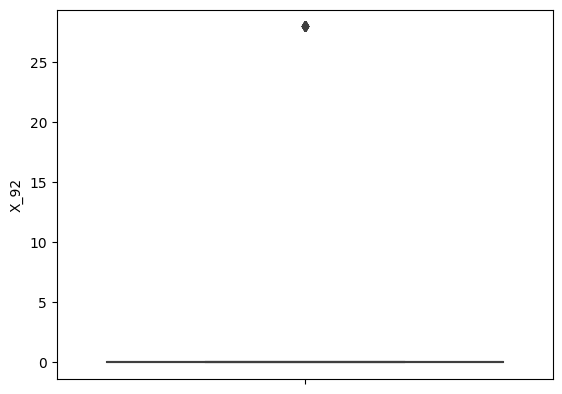

In [163]:
import seaborn as sns
sns.boxplot(y = 'X_92', data = train_df_0)

<AxesSubplot:>

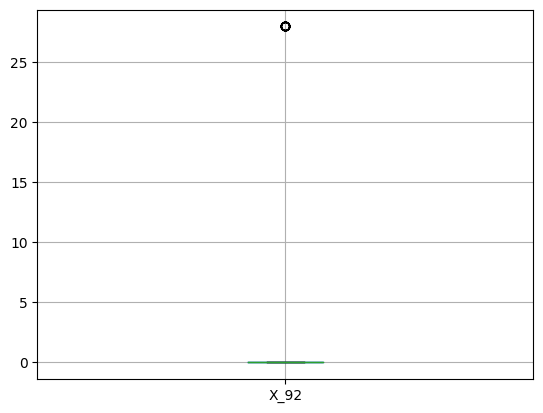

In [166]:
train_df_0.boxplot(column=['X_92'])

In [23]:
##########아웃라이어를 어떻게 제거해줄지 고민하다 끊겼음
value_type_num = train_df.nunique().tolist()
value_type_num

[598,
 3,
 583,
 598,
 6,
 3,
 10,
 16,
 1,
 2,
 13,
 2,
 2,
 1,
 251,
 178,
 169,
 2,
 4,
 8,
 5,
 1,
 67,
 72,
 66,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 2,
 10,
 12,
 11,
 12,
 11,
 9,
 14,
 12,
 12,
 13,
 12,
 14,
 12,
 13,
 15,
 11,
 14,
 15,
 16,
 13,
 19,
 11,
 19,
 8,
 13,
 13,
 10,
 1,
 1,
 1,
 1,
 1,
 23,
 1,
 1,
 2,
 2,
 2,
 1,
 4,
 1,
 1,
 1,
 2,
 2,
 1,
 13,
 15,
 16,
 1,
 42,
 52,
 33,
 1,
 49,
 54,
 47,
 1,
 46,
 81,
 39,
 1,
 2,
 2,
 2,
 1,
 29,
 31,
 48,
 24,
 23,
 1,
 349,
 175,
 175,
 174,
 174,
 78,
 78,
 42,
 42,
 3,
 2,
 3,
 1,
 67,
 67,
 73,
 99,
 93,
 107,
 2,
 4,
 1,
 108,
 1,
 31,
 32,
 35,
 2,
 3,
 3,
 1,
 2,
 3,
 3,
 1,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 1,
 2,
 3,
 2,
 1,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 27,
 8,
 8,
 8,
 8,
 7,
 7,
 9,
 9,
 9,
 9,
 8,
 8,
 9,
 8,
 8,
 9,
 8,
 8,
 8,
 8,
 7,
 13,
 12,
 12,
 8,
 7,
 10,
 10,
 7,
 13,
 8,
 6,
 8,
 8,
 8,
 7,
 2,
 4,
 3,
 9,
 1,
 37,
 1,
 27,
 27,
 1,